In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 0, train_size = 0.5) #50 / 50 split
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9066666666666666

In [3]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [4]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv = LeaveOneOut())
scores.mean()

0.96

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [6]:
import numpy as np
def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)
print("X is {} and y is {}".format(X.shape, y.shape))

X is (40, 1) and y is (40,)


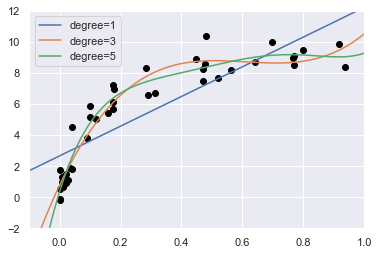

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color = 'black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label = 'degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

In [9]:
def get_relevant_keys():
    for param in PolynomialRegression().get_params().keys():
        print(param)

get_relevant_keys()

memory
steps
verbose
polynomialfeatures
linearregression
polynomialfeatures__degree
polynomialfeatures__include_bias
polynomialfeatures__interaction_only
polynomialfeatures__order
linearregression__copy_X
linearregression__fit_intercept
linearregression__n_jobs
linearregression__normalize


C:\Users\SYED\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 0, 'score')

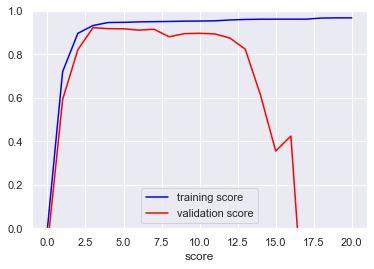

In [10]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', 
            degree, cv = 7)
plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.xlabel('score')

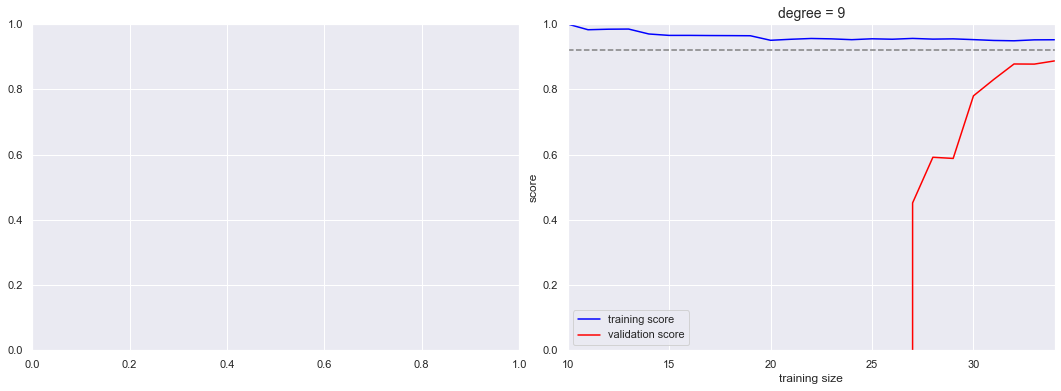

In [12]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv = 7, 
    train_sizes = np.linspace(0.3, 1, 25))

ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
ax[i].set_ylim(0, 1)
ax[i].set_xlim(N[0], N[-1])
ax[i].set_xlabel('training size')
ax[i].set_ylabel('score')
ax[i].set_title('degree = {0}'.format(degree), size=14)
ax[i].legend(loc = 'best')